# Experiments on 1D Cellular Automata with PyTorch

In [8]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [9]:
import sys
sys.path.append("../")

import abio

# Abio library development

In [10]:
from abio.cellular_automata import CellularAutomata1D

In [96]:
x = np.zeros(32)
x[16] = 1

In [103]:
def convert_rule_to_list(rule:int) -> list:
    rule = np.binary_repr(rule)
    rule = "0"*(8-len(rule))+rule
    rule = list(map(int,list(rule)))
    return rule

convert_rule_to_list(90)

[0, 1, 0, 1, 1, 0, 1, 0]

In [116]:
def iterative_update(state,rule):
    state_pad = np.pad(state,pad_width = 1)
    
    next_states = []
    
    for i in range(len(state)):
        window_state = state_pad[i:i+3]
        window_state = window_state * np.array([4,2,1])
        next_cell_index = int(np.sum(window_state))
        next_cell_state = rule[next_cell_index]
        
        next_states.append(next_cell_state)
        
    return np.array(next_states)

In [121]:
rule = convert_rule_to_list(90) 
init_state = np.random.binomial(1,p = 0.02,size = 1000)
rule

[0, 1, 0, 1, 1, 0, 1, 0]

In [122]:
%%time
states = []
x = init_state
for i in range(1000):
    x = iterative_update(x,rule)
    states.append(x)
states = np.vstack(x)

Wall time: 6.78 s


In [123]:
6800 / 400

17.0

In [125]:
180 / 20

9.0

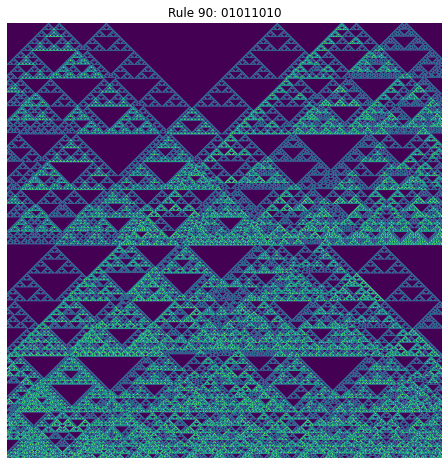

Wall time: 426 ms


In [83]:
%%time
from abio.cellular_automata import CellularAutomata1D
ca = CellularAutomata1D()
x = ca.run_random(rule = 90,size = 1000,p_init = 0.01,n_steps = 1000)

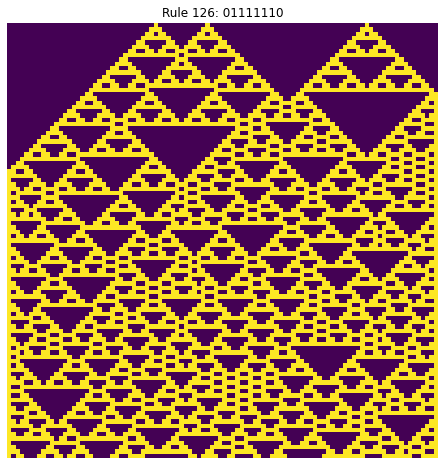

In [56]:
x = ca.run_random(size = 100,p_init = 0.02,return_fig = True)

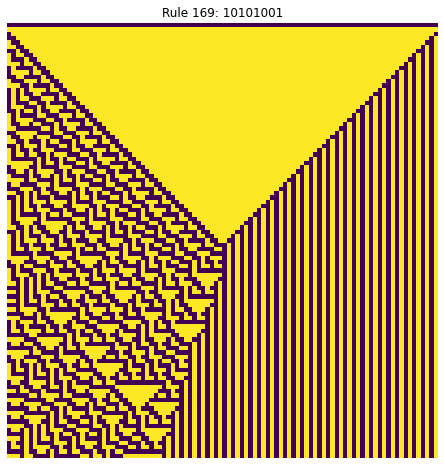

In [13]:
x = ca.run_random(size = 100,p_init = 0.02,return_fig = True)

# Playground